<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 7</b></center>    
<pre>    

# Ml Algorithm Comparison

# Import Libraries

In [6]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, mean_squared_error
# import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import warnings

# Load the diabetes dataset

In [8]:
warnings.filterwarnings('ignore')

In [7]:
file_path = 'diabetes.csv'
diabetes_df = pd.read_csv(file_path)

# Prepare the dataset

In [11]:
# X = diabetes_df.drop(columns=['Outcome'])
# y = diabetes_df['Outcome'].map({'Non Diabetic': 0, 'Diabetic': 1})  # Encode target variable
print("Dataset loaded successfully. First five rows:")
print(diabetes_df.head())


Dataset loaded successfully. First five rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age       Outcome  
0                     0.627   50      Diabetic  
1                     0.351   31  Non Diabetic  
2                     0.672   32      Diabetic  
3                     0.167   21  Non Diabetic  
4                     2.288   33      Diabetic  


# Split the dataset into training and testing sets

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = diabetes_df.iloc[:, :-1]  # All columns except the last one
y = diabetes_df.iloc[:, -1]   


# Define the models

In [13]:
# models = {
#     "Naive Bayes": GaussianNB(),
#     "SVM": SVC(kernel='linear', random_state=42),
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeClassifier(random_state=42)
# }
# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dictionary to store results

In [14]:
# results = {}
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate each model

In [17]:
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     if name == "Linear Regression":
#         # Linear Regression uses regression metrics
#         y_pred = np.round(model.predict(X_test))  # Round predictions to nearest class
#         mse = mean_squared_error(y_test, y_pred)
#         results[name] = {
#             "Metric": "Mean Squared Error",
#             "Value": mse
#         }
#     else:
#         # Classification metrics
#         y_pred = model.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)
#         results[name] = {
#             "Metric": "Accuracy",
#             "Value": accuracy
#         }

try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    print("XGBoost is not installed. Skipping XGBoost in the evaluation.")
    xgb_available = False

# List of algorithms to evaluate
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000)
}

if xgb_available:
    algorithms["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


# Display the results as a DataFrame

In [18]:
# results_df = pd.DataFrame(results).T
# print(results_df)

results = {}
for name, model in algorithms.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    avg_accuracy = cv_scores.mean()
    results[name] = avg_accuracy
    print(f"{name}: {avg_accuracy:.4f}")

Logistic Regression: 0.7606
Support Vector Machine: 0.7655
Decision Tree: 0.7133
Random Forest: 0.7785
k-Nearest Neighbors: 0.7395
Gradient Boosting: 0.7720
Naive Bayes: 0.7525
AdaBoost: 0.7720
Extra Trees: 0.7639
Neural Network (MLP): 0.7427


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\renis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\renis\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\renis\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Diabetic' 'Non Diabetic']


# Visualize the results

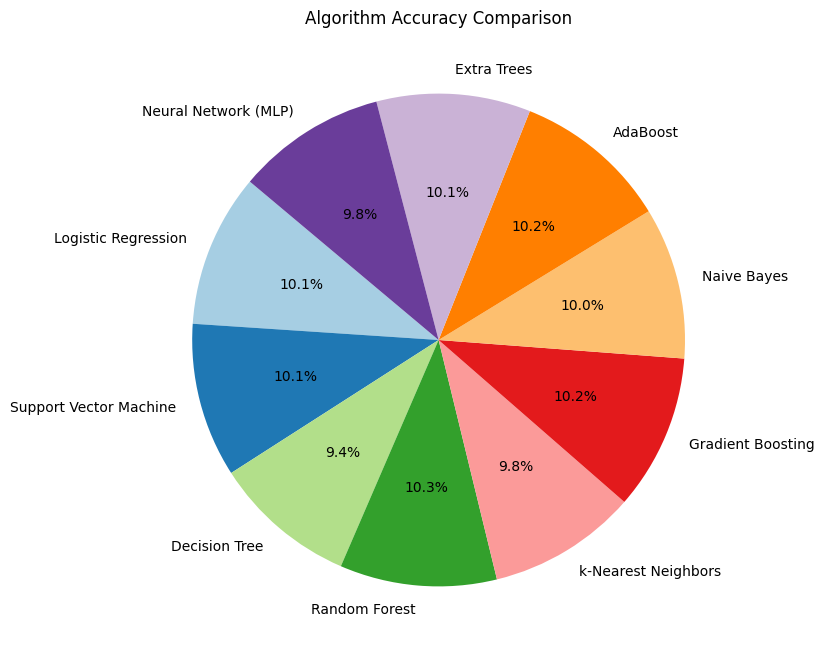

In [20]:
plt.figure(figsize=(10, 8))
plt.pie(results.values(), labels=results.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Algorithm Accuracy Comparison')
plt.show()

In [ ]:
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     if name == "Linear Regression":
#         # Linear Regression uses regression metrics
#         y_pred = np.round(model.predict(X_test))  # Round predictions to nearest class
#         mse = mean_squared_error(y_test, y_pred)
#         results[name] = {
#             "Metric": "Mean Squared Error",
#             "Value": mse
#         }
#     else:
#         # Classification metrics
#         y_pred = model.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)
#         results[name] = {
#             "Metric": "Accuracy",
#             "Value": accuracy
#         }

try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    print("XGBoost is not installed. Skipping XGBoost in the evaluation.")
    xgb_available = False

# List of algorithms to evaluate
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000)
}

if xgb_available:
    algorithms["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [19]:
# metrics = results_df["Metric"].unique()
# for metric in metrics:
#     filtered_results = results_df[results_df["Metric"] == metric]
#     plt.figure(figsize=(8, 5))
#     plt.bar(filtered_results.index, filtered_results["Value"], color='skyblue')
#     plt.title(f"Comparison of Models ({metric})", fontsize=14)
#     plt.ylabel(metric, fontsize=12)
#     plt.xticks(rotation=45, fontsize=10)
#     plt.tight_layout()
#     plt.show()

best_algorithm = max(results, key=results.get)
print("\nHighest Accuracy Algorithm:")
print(f"{best_algorithm} with accuracy: {results[best_algorithm]:.4f}")

# Train the best model on the entire training set and evaluate on test set
best_model = algorithms[best_algorithm]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest set accuracy of {best_algorithm}: {test_accuracy:.4f}")



Highest Accuracy Algorithm:
Random Forest with accuracy: 0.7785

Test set accuracy of Random Forest: 0.7662
